# Calculating Forest Metrics
This notebook will explain how to calculate and visualize forest metrics. Code snippets for how to get started using pyforestscan can be found in the notebook getting-started, and in the documentation. 

The example dataset is a one-square-kilometer tile derived from a 2019 aerial [LiDAR survey](https://www.fisheries.noaa.gov/inport/item/68082) of the Big Island of Hawaii. The data is captured over a dry forest and has a nominal pulse spacing of 0.35 meters. The data has been [preprocessed](https://zenodo.org/records/13151991) to classify ground and vegetation points.

First we will load the pyforestscan functions that will be used.

In [15]:
from pyforestscan.handlers import read_lidar, create_geotiff
from pyforestscan.visualize import plot_pad, plot_metric
from pyforestscan.filters import filter_hag
from pyforestscan.calculate import generate_dtm, assign_voxels, calculate_pad, calculate_pai, calculate_fhd, calculate_chm

## Import Data
We will begin by importing and preprocessing the data. It is important for a HeightAboveGround dimension to be defined, which can be accomplished by setting `hag=True` when importing data. 

In [16]:
file_path = "../example_data/20191210_5QKB020880.laz"
arrays = read_lidar(file_path, "EPSG:32605", hag=True)

Next, we will use `filter_hag()` to remove any points below ground. 

In [17]:
arrays = filter_hag(arrays)
points = arrays[0]

## Calculate Voxels
We need to create voxels, and assign points to them. Voxel resolution must be given as a tuple with the format `(x_res, y_res, z_res)` where `x_res`, `y_res`, and `z_res` are the resolutions along the x, y, and z axes.

In [18]:
voxel_resolution = (5, 5, 1) 
voxels, extent = assign_voxels(points, voxel_resolution)

## Calculate Forest Metrics
### Canopy Height Model
We will calculate and plot a canopy height model (CHM), showing the highest point above ground in each voxel column. `calculate_chm` will return the canopy height model along with its extent. Forest metrics are calculated in the same units as the data. In this case, since the data is in EPSG:32605, output will be in meters.

In [19]:
chm, extent = calculate_chm(points, voxel_resolution)

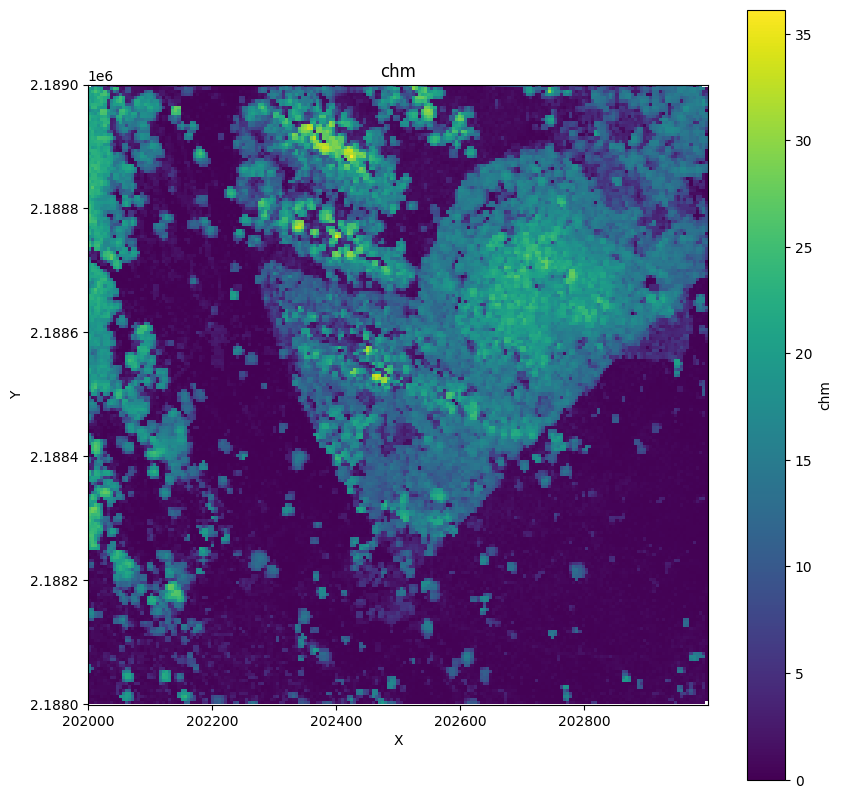

In [20]:
plot_metric('chm',chm, extent, cmap='viridis', fig_size=None)

### Plant Area Density
Next we will calculate and plot plant area density (PAD), showing density of plant matter within each voxel. 

In [21]:
pad = calculate_pad(voxels, voxel_resolution[-1])

In [24]:
plot_pad(pad, voxel_resolution[-1],5, axis='y', cmap='viridis')

TypeError: plot_pad() got multiple values for argument 'axis'

Note: Because PAD is not a 2D arrray, plot_metric cannot be used.

### Plant Area Index
You can calculate and plot plant area index (PAI), the total plant surface area in a given zone. 

In [23]:
pai = calculate_pai(pad)

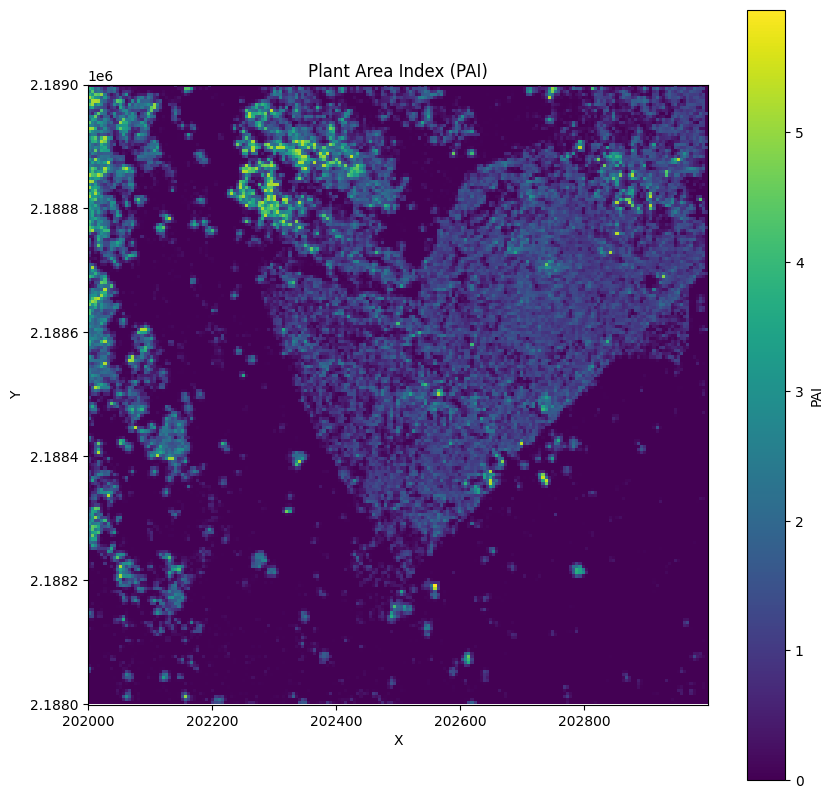

In [24]:
plot_metric('PAI', pai, extent, cmap='viridis', fig_size=None)

### Foliage Height Diversity
We can calculate foliage height diversity (fhd), a measure of the vertical distribution of foliage within a forest canopy. 

In [9]:
fhd = calculate_fhd(voxels)

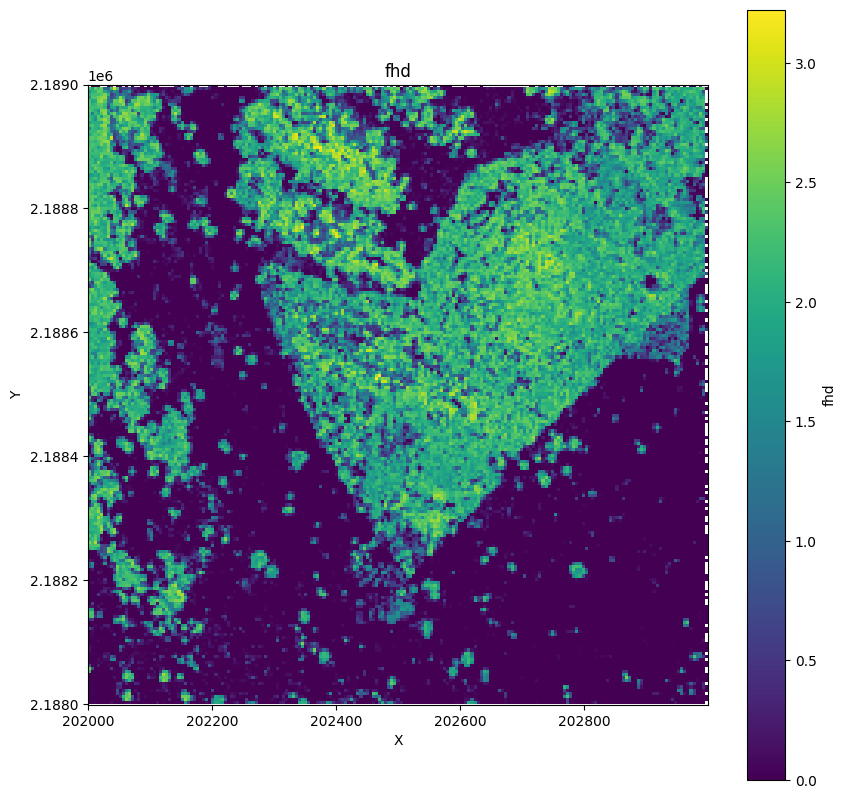

In [10]:
plot_metric('fhd',fhd, extent, cmap='viridis', fig_size=None)